<a href="https://colab.research.google.com/github/np03cs4a240275-eng/Concepts-and-Technologies-of-AI/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("bank.csv")

# 2. Inspect the DataFrame
print(df.info())

# 2(a) Columns with dtype = object
object_cols = df.select_dtypes(include="object").columns
print("Object Columns:\n", object_cols)

# 2(b) Unique values for those columns
for col in object_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# 2(c) Null values in each column
print("\nNull values in each column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Object Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'

In [32]:
#3
df_numeric = df.drop(columns=object_cols)

# Save numeric dataset
df_numeric.to_csv("banknumericdata.csv", index=False)

#4
df_num = pd.read_csv("banknumericdata.csv")

# Summary statistics
print(df_num.describe())


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [41]:
#Problem 2

import pandas as pd

df = pd.read_csv("medical_students_dataset.csv")

# 2. Info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None


In [42]:
# 2. Columns with missing values

missing_cols = df.columns[df.isnull().sum() > 0]
print("Columns with missing values:", missing_cols)


Columns with missing values: Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')


In [43]:
#3

# Identify columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

print("Columns with missing values:", missing_cols)

for col in missing_cols:

    # Numerical columns
    if df[col].dtype != "object":

        # Check skewness of distribution (to decide MEAN vs MEDIAN)
        skew_value = df[col].skew()
        print(f"Skewness of {col}: {skew_value}")

        if abs(skew_value) < 1:      # |skew| < 1 means approx. normal
            df[col] = df[col].fillna(df[col].mean())
            print(f"→ {col} filled with MEAN ({df[col].mean():.2f})")
        else:
            df[col] = df[col].fillna(df[col].median())
            print(f"→ {col} filled with MEDIAN ({df[col].median():.2f})")

    # Categorical columns
    else:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"→ {col} filled with MODE ('{mode_value}')")

df.head()


Columns with missing values: Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')
Skewness of Student ID: 0.0010832902877242984
→ Student ID filled with MEAN (49974.04)
Skewness of Age: -0.0033658351979544716
→ Age filled with MEAN (26.02)
→ Gender filled with MODE ('Male')
Skewness of Height: 0.0022729100922152475
→ Height filled with MEAN (174.95)
Skewness of Weight: 0.004819977448432481
→ Weight filled with MEAN (69.97)
→ Blood Type filled with MODE ('B')
Skewness of BMI: 0.43835089326636173
→ BMI filled with MEAN (23.34)
Skewness of Temperature: 0.010467186784471253
→ Temperature filled with MEAN (98.60)
Skewness of Heart Rate: -0.0010632541065531307
→ Heart Rate filled with MEAN (79.50)
Skewness of Blood Pressure: -0.004830090810279705
→ Blood Pressure filled with MEAN (114.56)
Skewness of Cholesterol: 0.004155044459428731
→ Cholestero

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No


In [14]:
#4

duplicates = df.duplicated().sum()
print("Total duplicates:", duplicates)

# Remove duplicates
df = df.drop_duplicates()
print("Duplicates dropped.")


Total duplicates: 12572
Duplicates dropped.


In [22]:
#Problem 1
titanic = pd.read_csv("Titanic-Dataset.csv")
subset = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]

first_class = subset[subset["Pclass"] == 1]
display(first_class.head())

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean:",mean_fare)
print("Median:",median_fare)
print("Maximum",max_fare)
print("Minimum:",min_fare)


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Mean: 84.1546875
Median: 60.287499999999994
Maximum 512.3292
Minimum: 0.0


In [23]:
#Problem 2
age_nulls = first_class['Age'].isnull().sum()
print("Null Age values:", age_nulls)

# Drop null Age rows
cleaned = first_class.dropna(subset=['Age'])
print("Null Age values dropped")

Null Age values: 30
Null Age values dropped


In [24]:
#Problem 3
encoded = pd.get_dummies(titanic['Embarked'], prefix="Embarked")

titanic_encoded = pd.concat([titanic, encoded], axis=1)

titanic_encoded = titanic_encoded.drop(columns=["Embarked"])

print(titanic_encoded.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean survival (Male): 0.18890814558058924
Mean survival (Female): 0.7420382165605095


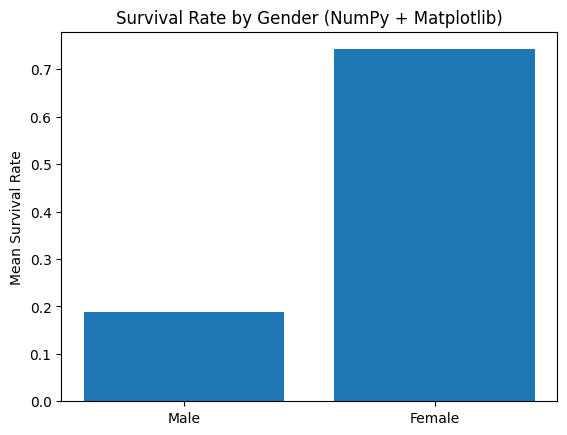

In [27]:
#Problem 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("Titanic-Dataset.csv")

# Convert needed columns to NumPy arrays
sex = titanic["Sex"].to_numpy()
survived = titanic["Survived"].to_numpy()
male_mask = (sex == "male")
female_mask = (sex == "female")
male_survival_mean = survived[male_mask].mean()
female_survival_mean = survived[female_mask].mean()

print("Mean survival (Male):", male_survival_mean)
print("Mean survival (Female):", female_survival_mean)
groups = np.array(["Male", "Female"])
means = np.array([male_survival_mean, female_survival_mean])

plt.bar(groups, means)
plt.title("Survival Rate by Gender (NumPy + Matplotlib)")
plt.ylabel("Mean Survival Rate")
plt.show()



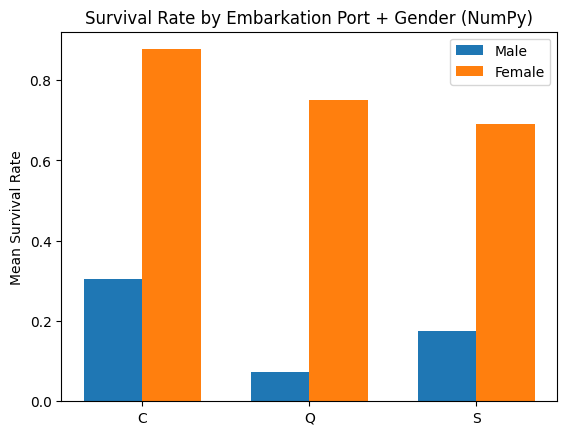

In [28]:
#Problem 5

embarked = titanic["Embarked"].to_numpy()
sex = titanic["Sex"].to_numpy()
survived = titanic["Survived"].to_numpy()
C_mask = (embarked == "C")
C_male = survived[C_mask & (sex == "male")].mean()
C_female = survived[C_mask & (sex == "female")].mean()
Q_mask = (embarked == "Q")
Q_male = survived[Q_mask & (sex == "male")].mean()
Q_female = survived[Q_mask & (sex == "female")].mean()
S_mask = (embarked == "S")
S_male = survived[S_mask & (sex == "male")].mean()
S_female = survived[S_mask & (sex == "female")].mean()
labels = ["C", "Q", "S"]

male_means = np.array([C_male, Q_male, S_male])
female_means = np.array([C_female, Q_female, S_female])
x = np.arange(len(labels))  # positions for ports
width = 0.35                # bar width

plt.bar(x - width/2, male_means, width, label="Male")
plt.bar(x + width/2, female_means, width, label="Female")

plt.xticks(x, labels)
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Embarkation Port + Gender (NumPy)")
plt.legend()

plt.show()
